<a href="https://colab.research.google.com/github/Chinmaya-3141/Machine-Learning-Emission-Data/blob/edit1/MSE_Presentation_File_25_01_2023_Chinmaya_Venkataraman_14_02_2023_Edit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Gas Turbine Emission Data**

## Preparation

###Code execution start time

In [1]:
from datetime import datetime
import pytz
print('Code execution last started at  ',datetime.now(pytz.timezone('Asia/Kolkata')))

Code execution last started at   2023-02-16 22:28:32.045497+05:30


### Fetch Data

In [2]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip

--2023-02-16 16:58:38--  https://archive.ics.uci.edu/ml/machine-learning-databases/00551/pp_gas_emission.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1090294 (1.0M) [application/x-httpd-php]
Saving to: ‘pp_gas_emission.zip’

pp_gas_emission.zip 100%[===================>]   1.04M  1.02MB/s    in 1.0s    

2023-02-16 16:58:40 (1.02 MB/s) - ‘pp_gas_emission.zip’ saved [1090294/1090294]



In [3]:
# !gdown 1otUkltGJRfbVDTvCmElLTnmnV-4FEtrF

In [4]:
!unzip pp_gas_emission.zip

Archive:  pp_gas_emission.zip
  inflating: gt_2011.csv             
  inflating: gt_2012.csv             
  inflating: gt_2013.csv             
  inflating: gt_2014.csv             
  inflating: gt_2015.csv             


### Preprocessing

#### Import Data

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.concat([pd.read_csv("gt_2011.csv"),\
                     pd.read_csv("gt_2012.csv"),\
                     pd.read_csv("gt_2013.csv"),\
                     pd.read_csv("gt_2014.csv"),\
                     pd.read_csv("gt_2015.csv")],\
                    axis=0)

In [7]:
data.shape

(36733, 11)

In [8]:
data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000,36733.000000
mean,17.712726,1013.070165,77.867015,3.925518,25.563801,1081.428084,546.158517,133.506404,12.060525,2.372468,65.293067
std,7.447451,6.463346,14.461355,0.773936,4.195957,17.536373,6.842360,15.618634,1.088795,2.262672,11.678357
min,-6.234800,985.850000,24.085000,2.087400,17.698000,1000.800000,511.040000,100.020000,9.851800,0.000388,25.905000
25%,11.781000,1008.800000,68.188000,3.355600,23.129000,1071.800000,544.720000,124.450000,11.435000,1.182400,57.162000
50%,17.801000,1012.600000,80.470000,3.937700,25.104000,1085.900000,549.880000,133.730000,11.965000,1.713500,63.849000
75%,23.665000,1017.000000,89.376000,4.376900,29.061000,1097.000000,550.040000,144.080000,12.855000,2.842900,71.548000
max,37.103000,1036.600000,100.200000,7.610600,40.716000,1100.900000,550.610000,179.500000,15.159000,44.103000,119.910000


#### EDA

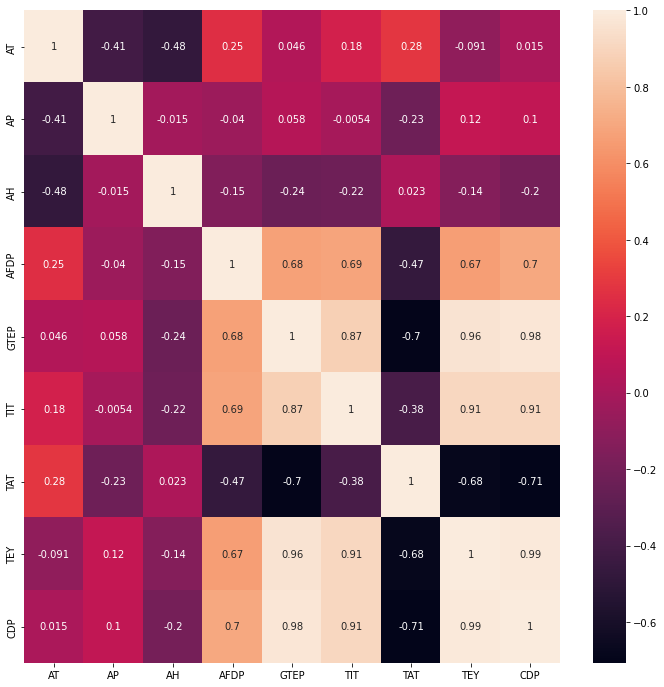

In [9]:
# Showing correlation of all variables among each other and not selecting target variables

plt.figure(figsize=(12,12))
sns.heatmap(data.loc[:,'AT':'CDP'].corr(),annot=True)
# plt.savefig("corr.png")

In [10]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize']=(16,7)
# f, (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9) = plt.subplots(1,9)
# sns.boxplot(data=data['AT'], ax=ax1, palette = 'coolwarm')
# sns.boxplot(data=data['AP'], ax=ax2)
# sns.boxplot(data=data['AH'], ax=ax3, palette = 'coolwarm')
# sns.boxplot(data=data['AFDP'], ax=ax4)
# sns.boxplot(data=data['GTEP'], ax=ax5, palette='coolwarm')
# sns.boxplot(data=data['TIT'], ax=ax6)
# sns.boxplot(data=data['TAT'], ax=ax7, palette='coolwarm')
# sns.boxplot(data=data['TEY'], ax=ax8)
# sns.boxplot(data=data['CDP'], ax=ax9, palette = 'coolwarm')
# f.tight_layout()
# plt.savefig("boxplot.png")

In [11]:
# data.to_csv()

#### Outlier Treatment

In [12]:
#LOF is a robust outlier detection method in ML

from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

In [13]:
# Scaling all variables except for target variables

data_scaled= StandardScaler().fit_transform(data.loc[:,'AT':'CDP'])

In [14]:
data.shape

(36733, 11)

In [15]:
# Using Local Outlier Factor to identify potential outliers

# lof=LocalOutlierFactor(n_neighbors=5)
# pred = lof.fit_predict(data_scaled)

In [16]:
# pd.Series(pred).value_counts()

In [17]:
# initialising an empty array, passing no of rows/entries using shape[0]
# storing predictions for 5,7,9 neighbours in all_preds by looping n_neigh over range(5,10,2)

all_preds = np.zeros(shape=(data_scaled.shape[0],3))
i=0
for n_neigh in range(5,10,2):
  lof=LocalOutlierFactor(n_neighbors=n_neigh)
  pred=lof.fit_predict(data_scaled)
  all_preds[:,i]=pred
  i+=1

In [18]:
all_preds

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       ...,
       [ 1.,  1.,  1.],
       [-1., -1.,  1.],
       [ 1.,  1.,  1.]])

In [19]:
# Sum along rows, that is sum prediction whether outlier or not according to 5,7 and 9 neighbour prediction

outlier_preds = all_preds.sum(axis=1)

In [20]:
# outlier_preds

In [21]:
# Summed values

# np.unique(outlier_preds)

In [22]:
# Pick points which are considered outliers by at least two out of three n_neighbours lof
# This will happen when sum of row is 1 or 3
# final_outlier assigns 1 to outliers
# This is done by checking if rowsum is >= 1, that is 1 or 3
# If two lof numbers say not outlier, we keep it
# Like a voting method.

final_outlier=np.where(outlier_preds>=1,1,-1)

In [23]:
final_outlier

array([ 1,  1,  1, ...,  1, -1,  1])

In [24]:
# Checking percentage of Outliers to non-outliers from our prediction

pd.Series(final_outlier).value_counts(normalize=True)

 1    0.973784
-1    0.026216
dtype: float64

Consensus outliers:

(963/36733)*100 \
= 2.6216208858519587%

In [25]:
data_no_outlier = data[final_outlier==1]

## Multiple Linear Regression

### Import Modules

In [26]:
import statsmodels.formula.api as sm

In [27]:
columns=data.columns

In [28]:
columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [29]:
# data_2015_NOx=data_2015_no_outlier.drop('CO',axis=1)
# data_2015_CO=data_2015_no_outlier.drop('NOX',axis=1)

### Linear Regression

In [30]:
# Join column numbers 1 to 9 to pass string with formula for CO

f1='CO~'+'+'.join(columns[:9])
f1

'CO~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [31]:
r_co=sm.ols(formula=f1, data=data_no_outlier)

In [32]:
result_co=r_co.fit()

In [33]:
result_co.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CO   R-squared:                       0.582
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     5536.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:58:47   Log-Likelihood:                -62953.
No. Observations:               35770   AIC:                         1.259e+05
Df Residuals:                   35760   BIC:                         1.260e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    121.8235      2.119     57.502      0.000     117.671     125.976
AT            -0.0501      0.003    -17.351      0.000      -0.056      -0.044
AP            -0.0020      0.001     -1.389      0.165      -0.005       0.001
AH            -0.0076      0.001    -11.773      0.000      -0.009      -0.006
AFDP          -0.1614      0.015    -10.550      0.000      -0.191      -0.131
GTEP           0.1016      0.010     10.427      0.000       0.082       0.121
TIT           -0.0690      0.003    -26.221      0.000      -0.074      -0.064
TAT           -0.0754      0.003    -21.650      0.000      -0.082      -0.069
TEY           -0.1916      0.008    -25.040      0.000      -0.207      -0.177
CDP            1.9421      0.108     17.977      0.000       1.730       2.154
==============================================================================
Omnibus:                    45324.595   Durbin-Watson:                   0.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         21766576.561
Skew:                           6.593   Prob(JB):                         0.00
Kurtosis:                     123.127   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [34]:
# Join column numbers 1 to 9 to pass string with formula for NOx

f2='NOX~'+'+'.join(columns[:9])
f2

'NOX~AT+AP+AH+AFDP+GTEP+TIT+TAT+TEY+CDP'

In [35]:
# OLS Regression

r_nox=sm.ols(formula=f2, data=data_no_outlier)

In [36]:
result_nox=r_nox.fit()

In [37]:
result_nox.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NOX   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     4268.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:58:47   Log-Likelihood:            -1.2546e+05
No. Observations:               35770   AIC:                         2.509e+05
Df Residuals:                   35760   BIC:                         2.510e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -61.5671     12.162     -5.062      0.000     -85.406     -37.728
AT            -1.7649      0.017   -106.504      0.000      -1.797      -1.732
AP            -0.2360      0.008    -28.839      0.000      -0.252      -0.220
AH            -0.2224      0.004    -60.016      0.000      -0.230      -0.215
AFDP           0.7286      0.088      8.295      0.000       0.556       0.901
GTEP          -0.1015      0.056     -1.815      0.070      -0.211       0.008
TIT            1.4144      0.015     93.655      0.000       1.385       1.444
TAT           -1.5245      0.020    -76.244      0.000      -1.564      -1.485
TEY           -1.9461      0.044    -44.304      0.000      -2.032      -1.860
CDP           -1.9019      0.620     -3.067      0.002      -3.117      -0.686
==============================================================================
Omnibus:                     7249.078   Durbin-Watson:                   0.369
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26041.843
Skew:                           0.996   Prob(JB):                         0.00
Kurtosis:                       6.675   Cond. No.                     4.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Variable selection using Variance Inflation Factor (VIF)

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [39]:
variance_inflation_factor(data_no_outlier.loc[:,'AT':'CDP'].values,0)

46.86457466862405

In [40]:
# [i for i in range(10)]

In [41]:
X_1 = data_no_outlier.loc[:,'AT':'CDP'].copy()

In [42]:
vif_scores = {k: v for k, v in zip(X_1.columns,
                                   [variance_inflation_factor(X_1.values, i) \
                                    for i in range(len(X_1.columns))])}

In [43]:
vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),key=lambda item:item[1], reverse = True)}

In [44]:
vif_scores_sorted

{'TIT': 121734.40451561549,
 'TAT': 63794.72222418256,
 'AP': 28307.64508797133,
 'CDP': 27875.950114991723,
 'TEY': 13827.838631867879,
 'GTEP': 1057.1442758291464,
 'AFDP': 67.3993997468524,
 'AT': 46.86457466862405,
 'AH': 46.00271067397057}

In [45]:
# X_1.columns.drop('TIT')

#### Defining functions to select variables with lowest VIF

In [46]:
def var_selection_vif(data_exog: pd.DataFrame, th: int=5):
  # Explanation:
  # vif_scores calculates vif for dataframe passed for each variable and put it into a dictionary
  # k iterates over columns (string), v iterates over vif value for variable.
  # Note, zip creates tuples, so iterating over list of tuples

  # data_exog.values is an array containing features on which linear regression is performed
  # i is index of additional feature whose influence on the other features is to be measured.

  vif_scores = {k: v for k, v in zip(data_exog.columns,
                                     [variance_inflation_factor(data_exog.values,i)\
                                      for i in range(len(data_exog.columns))])}
                                      
  # New dictionary with sorted values from vif_scores dictionary created above
  vif_scores_sorted = {k:v for k, v in sorted(vif_scores.items(),
                                            key=lambda item:item[1],
                                            reverse = True)}
  # Passing threshold parameter, default value 5, removing variables with higher threshold
  if vif_scores_sorted[list(vif_scores_sorted.keys())[0]]>th:
    vars = data_exog.columns.drop(list(vif_scores_sorted.keys())[0])
    return (data_exog[vars], vif_scores_sorted)
  else:
    return(data_exog, vif_scores_sorted)

In [47]:
# X_1 copy of data
n_old = len(X_1.columns)
n_new = 0

# Run loop till all variables are dropped or no more variables are being dropped due to being under the threshold passed.
while n_old != n_new:
  X_1, vif = var_selection_vif(X_1)
  print(vif)
  n = len(X_1.columns)
  n_old = n_new
  n_new= n

{'TIT': 121734.40451561549, 'TAT': 63794.72222418256, 'AP': 28307.64508797133, 'CDP': 27875.950114991723, 'TEY': 13827.838631867879, 'GTEP': 1057.1442758291464, 'AFDP': 67.3993997468524, 'AT': 46.86457466862405, 'AH': 46.00271067397057}
{'CDP': 26213.793293308318, 'AP': 25132.999808507677, 'TAT': 16654.669880172027, 'TEY': 12389.760061720457, 'GTEP': 998.8772137798093, 'AFDP': 64.11990672897241, 'AH': 45.076480065618966, 'AT': 42.38049924200662}
{'AP': 10427.885813072946, 'TAT': 10285.376502461655, 'TEY': 1652.4813561896851, 'GTEP': 881.4367428504926, 'AFDP': 63.55045455859313, 'AH': 44.157242132533455, 'AT': 18.663482430935414}
{'TEY': 1633.9781998684982, 'GTEP': 820.2615455119885, 'TAT': 273.0289962365141, 'AFDP': 61.77791042516804, 'AH': 43.633800292642555, 'AT': 14.028633028570969}
{'TAT': 117.53107832474556, 'GTEP': 75.85442546047754, 'AFDP': 57.56605380964737, 'AH': 43.38510835859359, 'AT': 10.44256264426581}
{'AFDP': 56.88593015304628, 'GTEP': 54.566599149677266, 'AH': 14.490126

### Regression with variables having appropriate VIF

In [48]:
r_final_co = sm.ols(formula='CO~AT+AH', 
                 data = data_no_outlier[list(X_1.columns)+['CO']])
result_final_co = r_final_co.fit()
print(result_final_co.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     614.8
Date:                Thu, 16 Feb 2023   Prob (F-statistic):          3.03e-263
Time:                        16:58:48   Log-Likelihood:                -77956.
No. Observations:               35770   AIC:                         1.559e+05
Df Residuals:                   35767   BIC:                         1.559e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7753      0.089     31.036      0.0

In [49]:
r_final_nox = sm.ols(formula='NOX~AT+AH', 
                 data = data_no_outlier[list(X_1.columns)+['NOX']])
result_final_nox = r_final_nox.fit()
print(result_final_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     8574.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:58:48   Log-Likelihood:            -1.3151e+05
No. Observations:               35770   AIC:                         2.630e+05
Df Residuals:                   35767   BIC:                         2.630e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     90.5104      0.400    226.492      0.0

### Variable selection using Lasso regression coefficients

In [50]:
from sklearn.linear_model import Lasso

In [51]:
lasso_reg1 = Lasso(alpha=2)
lasso_reg1.fit(X=data_no_outlier.loc[:,'AT':'CDP'],\
              y=data_no_outlier['CO'])

Lasso(alpha=2)

In [52]:
CO_vars = {k:v for k,v in zip(data_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg1.coef_)}

In [53]:
lasso_reg1.score(X=data_no_outlier.loc[:,'AT':'CDP'],\
              y=data_no_outlier['CO'])

0.5374513201552922

In [54]:
lasso_reg2 = Lasso(alpha=2)
lasso_reg2.fit(X=data_no_outlier.loc[:,'AT':'CDP'],\
               y=data_no_outlier['NOX'])

Lasso(alpha=2)

In [55]:
NOx_vars = {k:v for k,v in zip(data_no_outlier.loc[:,'AT':'CDP'].columns, lasso_reg2.coef_)}

In [56]:
lasso_reg2.score(X=data_no_outlier.loc[:,'AT':'CDP'],\
                 y=data_no_outlier['NOX'])

0.46343430445271516

### Analysis of errors

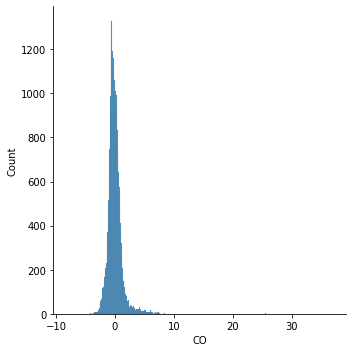

In [57]:
errors1 = data_no_outlier['CO'] - lasso_reg1.predict(data_no_outlier.loc[:,'AT':'CDP'])
d1=sns.displot(errors1)
plt.savefig('error-plot-CO.png')

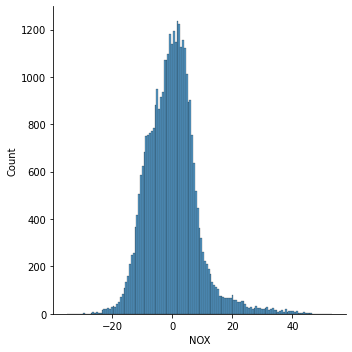

In [58]:
errors2 = data_no_outlier['NOX'] - lasso_reg2.predict(data_no_outlier.loc[:,'AT':'CDP'])
d2=sns.displot(errors2)
plt.savefig('error-plot-NOx.png')

In [59]:
import statsmodels.api as smf

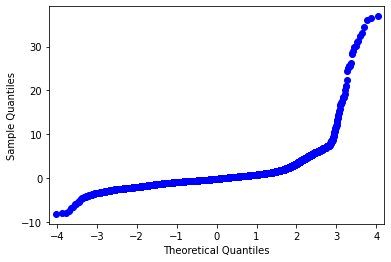

<Figure size 432x288 with 0 Axes>

In [60]:
smf.qqplot(errors1)
plt.show()
plt.savefig('error-dist-CO.png')

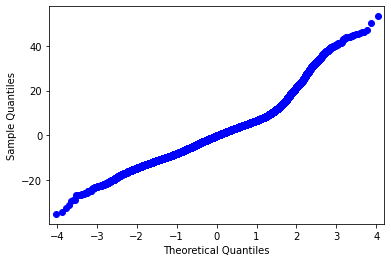

<Figure size 432x288 with 0 Axes>

In [61]:
smf.qqplot(errors2)
plt.show()
plt.savefig('error-dist-NOx.png')

### Multiple Linear Regression with relevant variables

In [62]:
r_co_final_combined = sm.ols(formula='CO~AT+AH+TIT+TAT',\
                             data = data[['AT','AP','AH','TIT','TAT']+['CO']])
result_co = r_co_final_combined.fit()
print(result_co.summary())

                            OLS Regression Results                            
Dep. Variable:                     CO   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                 1.148e+04
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:58:51   Log-Likelihood:                -67223.
No. Observations:               36733   AIC:                         1.345e+05
Df Residuals:                   36728   BIC:                         1.345e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    164.5889      1.100    149.691      0.0

In [63]:
r_nox_final_combined = sm.ols(formula='NOX~AT+AP+AH+TIT+TAT+TEY',\
                              data = data[['AT','AP','AH','TIT','TAT','TEY']+['NOX']])
result_nox = r_nox_final_combined.fit()
print(result_nox.summary())

                            OLS Regression Results                            
Dep. Variable:                    NOX   R-squared:                       0.517
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     6546.
Date:                Thu, 16 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:58:51   Log-Likelihood:            -1.2904e+05
No. Observations:               36733   AIC:                         2.581e+05
Df Residuals:                   36726   BIC:                         2.582e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -83.1243     10.420     -7.978      0.0

### Cook's Distance

In [64]:
#cook's distnace tells the change in model when a single datapoint is dropped

In [65]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [66]:
inf1 = influence(result_co)

In [67]:
inf2 = influence(result_nox)

In [68]:
inf1.cooks_distance

(0       0.000020
 1       0.000016
 2       0.000015
 3       0.000023
 4       0.000024
           ...   
 7379    0.000378
 7380    0.000412
 7381    0.000463
 7382    0.000013
 7383    0.000737
 Length: 36733, dtype: float64,
 array([1.        , 1.        , 1.        , ..., 0.99999999, 1.        ,
        0.99999996]))

In [69]:
inf2.cooks_distance

(0       5.465794e-06
 1       4.153554e-06
 2       9.388358e-07
 3       5.122620e-06
 4       8.282686e-06
             ...     
 7379    1.089896e-04
 7380    1.152904e-04
 7381    3.589406e-04
 7382    2.392390e-05
 7383    7.031486e-04
 Length: 36733, dtype: float64, array([1., 1., 1., ..., 1., 1., 1.]))

In [70]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:28:52.084258+05:30


In [71]:
# 4/n is a 'rule of thumb' threshold

inf1.summary_frame()[inf1.summary_frame()['cooks_d']>=4/36733]

,dfb_Intercept,dfb_AT,dfb_AH,dfb_TIT,dfb_TAT,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.005980,0.008678,0.002303,-0.004446,-0.005974,0.000149,1.791506,0.000233,0.027332,1.791560,0.027333
0,0.000235,0.003484,-0.001629,0.002011,-0.001894,0.000149,1.791506,0.000233,0.027332,1.791560,0.027333
0,0.021153,0.000368,0.002442,-0.022707,-0.014332,0.000149,1.791506,0.000233,0.027332,1.791560,0.027333
0,0.001781,0.003459,-0.003887,0.000533,-0.002935,0.000149,1.791506,0.000233,0.027332,1.791560,0.027333
0,0.005636,-0.010066,-0.004610,-0.008810,-0.001047,0.000149,1.791506,0.000233,0.027332,1.791560,0.027333
...,...,...,...,...,...,...,...,...,...,...,...
7601,0.030612,0.005149,0.005950,-0.030068,-0.023175,0.000258,1.931540,0.000345,0.035888,1.931612,0.035890
7602,0.055007,0.010858,0.010149,-0.052491,-0.042835,0.000781,3.067947,0.000414,0.062473,3.068299,0.062480
7603,0.039793,0.006049,0.007193,-0.039379,-0.029849,0.000440,2.559794,0.000336,0.046900,2.559987,0.046903
7606,0.032060,0.003447,0.005516,-0.032533,-0.023365,0.000305,2.335162,0.000280,0.039081,2.335304,0.039084


In [72]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:35:43.219138+05:30


In [73]:
# 4/n is a 'rule of thumb' threshold

inf2.summary_frame()[inf2.summary_frame()['cooks_d']>=4/36733]

,dfb_Intercept,dfb_AT,dfb_AP,dfb_AH,dfb_TIT,dfb_TAT,dfb_TEY,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.002973,0.005147,0.000155,0.001673,-0.003622,0.001399,0.003217,0.000247,2.520932,0.000272,0.041572,2.521116,0.041575
0,0.002973,0.005147,0.000155,0.001673,-0.003622,0.001399,0.003217,0.000510,3.923372,0.000232,0.059720,3.924141,0.059732
0,-0.000317,0.001301,0.000936,0.000085,-0.000842,0.000699,0.000934,0.000247,2.520932,0.000272,0.041572,2.521116,0.041575
0,-0.000317,0.001301,0.000936,0.000085,-0.000842,0.000699,0.000934,0.000510,3.923372,0.000232,0.059720,3.924141,0.059732
0,0.005380,-0.004140,0.008635,0.003556,0.005256,-0.019551,-0.011958,0.000247,2.520932,0.000272,0.041572,2.521116,0.041575
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7589,0.004235,-0.005383,0.002524,0.005356,0.006064,-0.014635,-0.010602,0.000128,1.969987,0.000231,0.029949,1.970064,0.029950
7601,0.007377,0.003624,0.013945,0.009115,0.000934,-0.020494,-0.008685,0.000330,2.406685,0.000398,0.048027,2.406842,0.048031
7602,0.010733,0.005306,0.015806,0.010649,0.000894,-0.025695,-0.010314,0.000478,2.663171,0.000472,0.057854,2.663392,0.057859
7603,0.007432,0.002713,0.019304,0.011028,0.004078,-0.029058,-0.014278,0.000581,3.185626,0.000401,0.063773,3.186023,0.063781


In [74]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:45:01.647292+05:30


### Distribution Plot

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to u

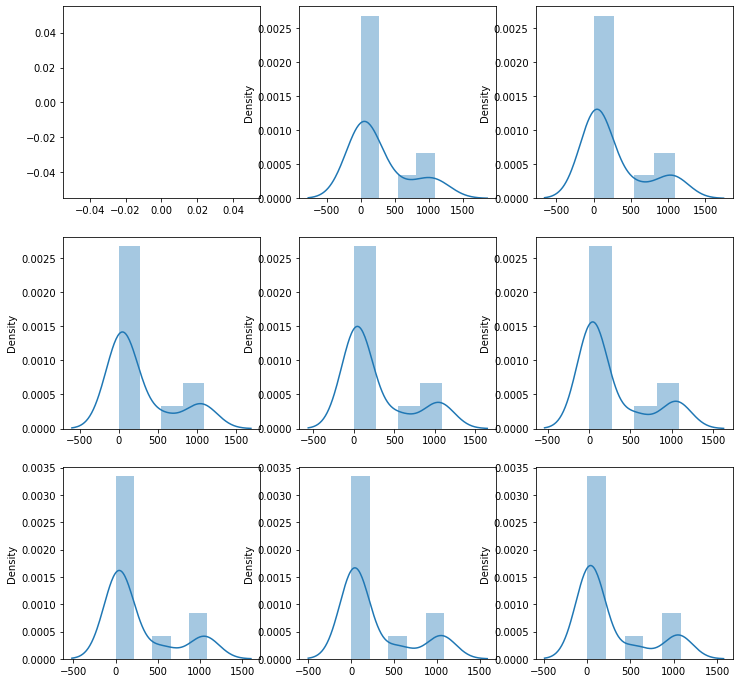

In [75]:
plt.figure(figsize=(12,12))
for i in range(1,10):
  plt.subplot(3,3,i)
  sns.distplot(data.iloc[:i-1])

## Machine Learning models

### Importing Relevant modules

In [76]:
# !pip install xgboost
# !pip install lightgbm

In [77]:
from hyperopt import fmin, hp, STATUS_OK, tpe , Trials
from hyperopt.pyll.base import scope
import hyperopt

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score, mean_absolute_error

In [79]:
lin_reg = LinearRegression()
lasso_reg = Lasso(alpha=0.001)
ridge_reg = Ridge(alpha=0.001)
enet_reg = ElasticNet(alpha = 0.001)
dt_reg = DecisionTreeRegressor()
rf_reg = RandomForestRegressor()
gbm_reg = GradientBoostingRegressor()
xgb_reg = XGBRegressor()
lgbm_reg = LGBMRegressor()

### Setting up hyperparameter search space for hyperopt

In [80]:
no_of_trials_dt = 1
no_of_trials_rf = 1
no_of_trials_gbm = 1
no_of_trials_xgb = 1
no_of_trials_lgbm = 1

In [81]:
# For CO

param_dt_co={
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0.1)
}

param_rf_co={
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'max_features':hp.choice('max_features',list(range(2,7)))
}

param_gbm_co = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1)
}

param_xgb_co = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree':hp.uniform('colsample_bytree',0.2,0.8)
}

param_lgbm_co = {
    # 'boosting_type': 'rf',
    'max_depth': scope.int(hp.quniform('max_depth',1,7,1)),
    'learning_rate': hp.uniform('learning_rate',0.001,0.1),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,500,1)),
    'colsample_bytree': hp.uniform('colsample_bytree',0.2,0.8)
}

In [82]:
# For NOx

param_dt_nox={
    'max_depth': scope.int(hp.quniform('max_depth',2,20,1)),
    'ccp_alpha': hp.uniform('ccp_alpha',0.001,0.1)
}

param_rf_nox={
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'max_features':hp.choice('max_features',list(range(2,7)))
}

param_gbm_nox = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1)
}

param_xgb_nox = {
    'max_depth':scope.int(hp.quniform('max_depth',1,6,1)),
    'n_estimators':scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate':hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree':hp.uniform('colsample_bytree',0.2,0.8)
}

param_lgbm_nox = {
    # 'boosting_type': 'rf',
    'max_depth': scope.int(hp.quniform('max_depth',1,7,1)),
    'n_estimators': scope.int(hp.quniform('n_estimators',50,500,1)),
    'learning_rate': hp.uniform('learning_rate',0.001,0.1),
    'colsample_bytree': hp.uniform('colsample_bytree',0.2,0.8)
}

In [83]:
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score

In [84]:
def rmse(y_act, y_pred):
  return (np.sqrt(np.mean((y_act-y_pred)**2)))

rmse = make_scorer(rmse, greater_is_better=False)

In [85]:
def evalfunc(y_act, y_pred):
  rmse_score = np.sqrt(mean_squared_error(y_act, y_pred))
  mae_score = mean_absolute_error(y_act, y_pred)
  exp_var_score = explained_variance_score(y_act, y_pred)
  rtwo_score = r2_score(y_act, y_pred)
  scores={"RMSE":rmse_score, 
          "MAE": mae_score, 
          "Explained Variance": exp_var_score, 
          "R2 Score": rtwo_score}
  return scores

In [86]:
def hp_obj_func_dt(param):
  dt= DecisionTreeRegressor(**param)
  out=cross_val_score(dt, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [87]:
def surr_func_dt(params):
  perf= hp_obj_func_dt(params)
  return {'loss':-perf,'status': STATUS_OK}  

In [88]:
def to_int_dt(params):
  params = {
      'max_depth': int(params['max_depth']),
      'ccp_alpha': params['ccp_alpha']
      }
  return params

In [89]:
def hp_obj_func_rf(param):
  rf= RandomForestRegressor(**param)
  out=cross_val_score(rf, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [90]:
def surr_func_rf(params):
  perf= hp_obj_func_rf(params)
  return {'loss':-perf,'status': STATUS_OK}  

In [91]:
def to_int_rf(params):
  params = {
      'n_estimators': int(params['n_estimators']),
      'max_features': int(params['max_features'])
      }
  return params

In [92]:
def hp_obj_func_gbm(param):
  gbm= GradientBoostingRegressor(**param)
  out=cross_val_score(gbm, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [93]:
def surr_func_gbm(params):
  perf= hp_obj_func_gbm(params)
  return {'loss':-perf,'status': STATUS_OK}  

In [94]:
def to_int_gbm(params):
  params = {
      'max_depth': int(params['max_depth']),
      'n_estimators': int(params['n_estimators']),
      'learning_rate': params['learning_rate']
      }
  return params

In [95]:
def hp_obj_func_xgb(param):
  xgb= XGBRegressor(**param)
  out=cross_val_score(xgb, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [96]:
def surr_func_xgb(params):
  perf= hp_obj_func_xgb(params)
  return {'loss':-perf,'status': STATUS_OK}

In [97]:
def to_int_xgb(params):
  params = {
      'max_depth': int(params['max_depth']),
      'n_estimators': int(params['n_estimators']),
      'learning_rate': params['learning_rate'],
      'colsample_bytree': params['colsample_bytree']
      }
  return params

In [98]:
def hp_obj_func_lgbm(param):
  lgbm= LGBMRegressor(**param)
  out=cross_val_score(lgbm, X=x_train, y= y_train, scoring='neg_root_mean_squared_error', cv=5).mean()
  print(out)
  return out

In [99]:
def surr_func_lgbm(params):
  perf= hp_obj_func_lgbm(params)
  return {'loss':-perf,'status': STATUS_OK}

In [100]:
def to_int_lgbm(params):
  params = {
      'max_depth': int(params['max_depth']),
      'n_estimators': int(params['n_estimators']),
      'learning_rate': params['learning_rate'],
      'colsample_bytree': params['colsample_bytree']
      }
  return params

### Modelling CO emissions

#### Train test split

In [101]:
gt_new_co = data.loc[:,'AT':'CO']
gt_new_co.shape

(36733, 10)

In [102]:
x_train, x_test, y_train, y_test = train_test_split(gt_new_co.loc[:, 'AT':'CDP'],gt_new_co['CO'],test_size=0.3, random_state=123)

#### Linear Regression on CO

In [103]:
lin_reg.fit(x_train, y_train)
pred_linreg_co = lin_reg.predict(x_test)
print(mean_squared_error(pred_linreg_co, y_test))

1.9456774833850263


In [104]:
eval_linreg_co = evalfunc(y_test,pred_linreg_co)
model = {'Model':'Linear Regression'}
eval_linreg_co = {**model, **eval_linreg_co }
eval_linreg_co

{'Model': 'Linear Regression',
 'RMSE': 1.3948754365121734,
 'MAE': 0.848450678573083,
 'Explained Variance': 0.5735383489443195,
 'R2 Score': 0.5735383489333926}

#### Lasso Regression on CO

In [105]:
lasso_reg.fit(x_train, y_train) 
pred_lassoreg_co = lasso_reg.predict(x_test)
print(mean_squared_error(pred_lassoreg_co, y_test))

1.9462381734506886


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.464e+03, tolerance: 1.378e+01
  model = cd_fast.enet_coordinate_descent(


In [106]:
eval_lassoreg_co = evalfunc(y_test,pred_lassoreg_co)
model = {'Model':'Lasso Regression'}
eval_lassoreg_co = {**model, **eval_lassoreg_co }
eval_lassoreg_co

{'Model': 'Lasso Regression',
 'RMSE': 1.3950764041623989,
 'MAE': 0.8479058829363678,
 'Explained Variance': 0.5734154607172484,
 'R2 Score': 0.5734154545620588}

#### Ridge Regression on CO

In [107]:
ridge_reg.fit(x_train, y_train) 
pred_ridgereg_co = ridge_reg.predict(x_test)
print(mean_squared_error(pred_ridgereg_co, y_test))

1.9456775109725006


In [108]:
eval_ridgereg_co = evalfunc(y_test,pred_ridgereg_co)
model = {'Model':'Ridge Regression'}
eval_ridgereg_co = {**model, **eval_ridgereg_co }
eval_ridgereg_co

{'Model': 'Ridge Regression',
 'RMSE': 1.39487544640104,
 'MAE': 0.8484506380334749,
 'Explained Variance': 0.5735383428976149,
 'R2 Score': 0.5735383428866557}

#### Elastic Net Regression on CO

In [109]:
enet_reg.fit(x_train, y_train) 
pred_enetreg_co = enet_reg.predict(x_test)
print(mean_squared_error(pred_enetreg_co, y_test))

1.9465129193234831


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.039e+03, tolerance: 1.378e+01
  model = cd_fast.enet_coordinate_descent(


In [110]:
eval_enetreg_co = evalfunc(y_test,pred_enetreg_co)
model = {'Model':'Elastic Net Regression'}
eval_enetreg_co = {**model, **eval_enetreg_co }
eval_enetreg_co

{'Model': 'Elastic Net Regression',
 'RMSE': 1.3951748705174858,
 'MAE': 0.8478352256321752,
 'Explained Variance': 0.5733552434617583,
 'R2 Score': 0.573355234623484}

#### Decision Tree on CO

##### Optimising hyperparameters with Hyperopt

In [111]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:45:05.187365+05:30


In [112]:
trials = Trials()
best_dt_co = fmin(surr_func_dt, space=param_dt_co, algo=tpe.suggest,
               max_evals=no_of_trials_dt, trials=trials)
best_dt_co = to_int_dt(best_dt_co)
print('best_dt for CO:')
print(best_dt_co)

-1.4356217294509475
100%|██████████| 1/1 [00:00<00:00,  1.10it/s, best loss: 1.4356217294509475]
best_dt for CO:
{'max_depth': 9, 'ccp_alpha': 0.08278126155468847}


In [113]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:45:06.137712+05:30


##### Predict and score

In [114]:
# best_dt_co = {'max_depth': 7, 'ccp_alpha': 0.0034544357322769366} # unknown iterations

In [115]:
best_dt_co = {'max_depth': 7, 'ccp_alpha': 0.0010389774199764997} # 1500 iterations - best loss: 1.3236361594996606

In [116]:
dt_reg = DecisionTreeRegressor(**best_dt_co)
dt_reg.fit(x_train, y_train)
pred_dt_co = dt_reg.predict(x_test)
print(mean_squared_error(pred_dt_co, y_test))

1.7103509012755973


In [117]:
eval_dt_co = evalfunc(y_test,pred_dt_co)
model = {'Model':'Decision Tree'}
eval_dt_co = {**model, **eval_dt_co }
eval_dt_co

{'Model': 'Decision Tree',
 'RMSE': 1.3078038466358772,
 'MAE': 0.6383332597661494,
 'Explained Variance': 0.6251229670203502,
 'R2 Score': 0.6251182040754943}

#### Random forest for CO




##### Optimising hyperparameters with Hyperopt

In [118]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:45:06.368434+05:30


In [119]:
trials = Trials()
best_rf_co = fmin(surr_func_rf, space=param_rf_co, algo=tpe.suggest,
               max_evals=no_of_trials_rf, trials=trials)


-1.1062024899860774
100%|██████████| 1/1 [02:10<00:00, 130.21s/it, best loss: 1.1062024899860774]


In [120]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:47:16.614565+05:30


In [121]:
best_rf_co = to_int_rf(best_rf_co)
print('best_rf for CO:')
print(best_rf_co)

best_rf for CO:
{'n_estimators': 313, 'max_features': 2}


##### Predict and score

In [122]:
# best_rf={'max_features': 2, 'n_estimators': 451}

In [123]:
best_rf_co = {'n_estimators': 333, 'max_features': 2} # ? iterations - think this one was better

In [124]:
rf_reg = RandomForestRegressor(**best_rf_co)
rf_reg.fit(x_train, y_train)
pred_rf_co = rf_reg.predict(x_test)

In [125]:
eval_rf_co = evalfunc(y_test,pred_rf_co)
model = {'Model':'Random Forest'}
eval_rf_co = {**model, **eval_rf_co }
eval_rf_co

{'Model': 'Random Forest',
 'RMSE': 1.0243352229431624,
 'MAE': 0.4847640568438984,
 'Explained Variance': 0.7700486540082079,
 'R2 Score': 0.7700182658739668}

#### GBM for CO

##### Optimising hyperparameters with Hyperopt

In [126]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:47:37.465945+05:30


In [127]:
trials = Trials()
best_gbm_co = fmin(surr_func_gbm, space=param_gbm_co, algo=tpe.suggest,
               max_evals=no_of_trials_gbm, trials=trials)


-1.1770458895581366
100%|██████████| 1/1 [03:02<00:00, 182.20s/it, best loss: 1.1770458895581366]


In [128]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:50:39.691548+05:30


In [129]:
best_gbm_co = to_int_gbm(best_gbm_co)

print('best_gbm for CO:')
print(best_gbm_co)

best_gbm for CO:
{'max_depth': 5, 'n_estimators': 469, 'learning_rate': 0.04464677932553549}


##### Predict and score

In [130]:
best_gbm_co = {'max_depth': 6, 
               'n_estimators': 450, 
               'learning_rate': 0.09395876873200759} # 100 iterations

In [131]:
gbm_reg = GradientBoostingRegressor(**best_gbm_co)
gbm_reg.fit(x_train, y_train)
pred_gbm_co = gbm_reg.predict(x_test)

In [132]:
eval_gbm_co = evalfunc(y_test,pred_gbm_co)
model = {'Model':'GBM'}
eval_gbm_co = {**model, **eval_gbm_co}
eval_gbm_co

{'Model': 'GBM',
 'RMSE': 1.1088304940477802,
 'MAE': 0.5248493468028417,
 'Explained Variance': 0.730530370948481,
 'R2 Score': 0.7305119865487164}

#### XgBoost for CO

##### Optimising hyperparameters with Hyperopt

In [133]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:51:32.302712+05:30


In [134]:
trials = Trials()
best_xgb_co = fmin(surr_func_xgb, space=param_xgb_co, algo=tpe.suggest,
               max_evals=no_of_trials_xgb, trials=trials)

[17:21:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:21:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-1.3989018026005966
100%|██████████| 1/1 [00:08<00:00,  8.34s/it, best loss: 1.3989018026005966]


In [135]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:51:40.675434+05:30


In [136]:
best_xgb_co = to_int_xgb(best_xgb_co)

print('best_xgb for CO:')
print(best_xgb_co)

best_xgb for CO:
{'max_depth': 1, 'n_estimators': 385, 'learning_rate': 0.06733085383385864, 'colsample_bytree': 0.5583279521310988}


##### Predict and score

In [137]:
# best_xgb = {'colsample_bytree': 0.7974445913518547, 
#             'learning_rate': 0.09830911482175203, 
#             'max_depth': 5, 
#             'n_estimators': 380}

In [138]:
# best_xgb = {'colsample_bytree': 0.5904951775918889, 
#             'learning_rate': 0.024729072063200287, 
#             'max_depth': 5, 
#             'n_estimators': 267}

In [139]:
best_xgb_co = {'max_depth': 6,
               'n_estimators': 437,
               'learning_rate': 0.0904575086334361,
               'colsample_bytree': 0.790911942518166}
# 500 trials

In [140]:
xgb_reg = XGBRegressor(**best_xgb_co)
xgb_reg.fit(x_train, y_train)
pred_xgb_co = xgb_reg.predict(x_test)

[17:21:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
eval_xgb_co = evalfunc(y_test,pred_xgb_co)
model = {'Model':'XgBoost'}
eval_xgb_co = {**model, **eval_xgb_co}
eval_xgb_co

{'Model': 'XgBoost',
 'RMSE': 1.081893548111886,
 'MAE': 0.523029104242749,
 'Explained Variance': 0.7434534062117033,
 'R2 Score': 0.7434463529704147}

#### LightGBM for CO

##### Optimising hyperparameters with Hyperopt

In [142]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:51:50.969382+05:30


In [143]:
trials = Trials()
best_lgbm_co = fmin(surr_func_lgbm, space=param_lgbm_co, algo=tpe.suggest,
               max_evals=no_of_trials_lgbm, trials=trials)


-1.4475017627074735
100%|██████████| 1/1 [00:00<00:00,  1.20it/s, best loss: 1.4475017627074735]


In [144]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:51:51.828154+05:30


In [145]:
best_lgbm_co = to_int_lgbm(best_lgbm_co)

print('best_lgbm for CO:')
print(best_lgbm_co)

best_lgbm for CO:
{'max_depth': 1, 'n_estimators': 456, 'learning_rate': 0.04578645070616253, 'colsample_bytree': 0.20602822766216744}


##### Predict and score

In [146]:
# best_lgbm = {'colsample_bytree': 0.6669160688292152,
#              'learning_rate': 0.07968656287632815,
#              'max_depth': 6,
#              'n_estimators': 491}

In [147]:
best_lgbm_co = {'max_depth': 7, 
                'n_estimators': 440, 
                'learning_rate': 0.09727625259227556, 
                'colsample_bytree': 0.7258988873327339}

# 500 iterations

In [148]:
lgbm_reg = LGBMRegressor(**best_lgbm_co)
lgbm_reg.fit(x_train, y_train)
pred_lgbm_co = lgbm_reg.predict(x_test)
print(mean_squared_error(pred_lgbm_co, y_test))

1.1941839377124204


In [149]:
eval_lgbm_co = evalfunc(y_test,pred_lgbm_co)
model = {'Model':'LightGBM'}
eval_lgbm_co = {**model, **eval_lgbm_co}
eval_lgbm_co

{'Model': 'LightGBM',
 'RMSE': 1.0927872335054158,
 'MAE': 0.5365204926494304,
 'Explained Variance': 0.7382836637008163,
 'R2 Score': 0.7382538174476667}

In [150]:
# Additional parameters to play around with

# lgbm = LGBMRegressor(boosting_type = 'rf', \
#                      num_leaves = \
#                      max_depth = \
#                      learning_rate = \
#                      n_estimators = \
#                      objective='regression', \
#                      random_state=123\
#                      n_jobs)

#### Linear and Nonlinear SVM for CO

##### Model Fitting without Hyperopt

In [151]:
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(x_train, y_train)

SVR(kernel='linear')

In [152]:
svr_linear.score(x_test,y_test)

0.5207580707476601

In [153]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(x_train, y_train) 

SVR()

In [154]:
svr_rbf.score(x_test,y_test)

0.4738454004095387

##### Predict and score

In [155]:
pred_svmlin_co = svr_linear.predict(x_test)
pred_svmrbf_co = svr_rbf.predict(x_test)

In [156]:
eval_svmlin_co = evalfunc(y_test,pred_svmlin_co)
model = {'Model':'SVM (Linear)'}
eval_svmlin_co = {**model, **eval_svmlin_co}
eval_svmlin_co

{'Model': 'SVM (Linear)',
 'RMSE': 1.4786753680891283,
 'MAE': 0.8820457907548394,
 'Explained Variance': 0.5381233309235107,
 'R2 Score': 0.5207580707476601}

In [157]:
eval_svmrbf_co = evalfunc(y_test,pred_svmrbf_co)
model = {'Model':'SVM (RBF)'}
eval_svmrbf_co = {**model, **eval_svmrbf_co}
eval_svmrbf_co

{'Model': 'SVM (RBF)',
 'RMSE': 1.5493592173593018,
 'MAE': 0.8408302360288261,
 'Explained Variance': 0.4903799289169122,
 'R2 Score': 0.4738454004095387}

In [158]:
# print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(x_test))))
# print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(x_test))))

### Modelling NOx emissions

#### Train test split

In [159]:
gt_new_nox = data.loc[:,'AT':'NOX']
gt_new_nox = gt_new_nox.drop(['CO'], axis = 1)
gt_new_nox.shape

(36733, 10)

In [160]:
x_train, x_test, y_train, y_test = train_test_split(gt_new_nox.loc[:, 'AT':'CDP'],gt_new_nox['NOX'],test_size=0.3, random_state=123)

#### Linear Regression for NOx

In [161]:
lin_reg.fit(x_train, y_train)
pred_linreg_nox = lin_reg.predict(x_test)

In [162]:
eval_linreg_nox = evalfunc(y_test,pred_linreg_nox)
model = {'Model':'Linear Regression'}
eval_linreg_nox = {**model, **eval_linreg_nox }
eval_linreg_nox

{'Model': 'Linear Regression',
 'RMSE': 8.011551737499103,
 'MAE': 5.775180137315883,
 'Explained Variance': 0.5177798910284216,
 'R2 Score': 0.517395121374184}

#### Lasso Regression on CO

In [163]:
lasso_reg.fit(x_train, y_train) 
pred_lassoreg_nox = lasso_reg.predict(x_test)
print(mean_squared_error(pred_lassoreg_nox, y_test))

64.1869641957689


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.787e+05, tolerance: 3.543e+02
  model = cd_fast.enet_coordinate_descent(


In [164]:
eval_lassoreg_nox = evalfunc(y_test,pred_lassoreg_nox)
model = {'Model':'Lasso Regression'}
eval_lassoreg_nox = {**model, **eval_lassoreg_nox }
eval_lassoreg_nox

{'Model': 'Lasso Regression',
 'RMSE': 8.011676740593625,
 'MAE': 5.775607739642493,
 'Explained Variance': 0.5177654108661126,
 'R2 Score': 0.5173800612270677}

#### Ridge Regression on CO

In [165]:
ridge_reg.fit(x_train, y_train) 
pred_ridgereg_nox = ridge_reg.predict(x_test)
print(mean_squared_error(pred_ridgereg_nox, y_test))

64.18496127737778


In [166]:
eval_ridgereg_nox = evalfunc(y_test,pred_ridgereg_nox)
model = {'Model':'Ridge Regression'}
eval_ridgereg_nox = {**model, **eval_ridgereg_nox }
eval_ridgereg_nox

{'Model': 'Ridge Regression',
 'RMSE': 8.011551739668027,
 'MAE': 5.775180155408408,
 'Explained Variance': 0.5177798908045069,
 'R2 Score': 0.5173951211128778}

#### Elastic Net Regression on CO

In [167]:
enet_reg.fit(x_train, y_train) 
pred_enetreg_nox = enet_reg.predict(x_test)
print(mean_squared_error(pred_enetreg_nox, y_test))

64.18666731941097


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.849e+05, tolerance: 3.543e+02
  model = cd_fast.enet_coordinate_descent(


In [168]:
eval_enetreg_nox = evalfunc(y_test,pred_enetreg_nox)
model = {'Model':'Elastic Net Regression'}
eval_enetreg_nox = {**model, **eval_enetreg_nox }
eval_enetreg_nox

{'Model': 'Elastic Net Regression',
 'RMSE': 8.011658212842768,
 'MAE': 5.775609006647121,
 'Explained Variance': 0.5177677518784083,
 'R2 Score': 0.5173822934318695}

#### Decision Tree for NOx

##### Optimising hyperparameters with Hyperopt

In [169]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:54:30.774537+05:30


In [170]:
trials = Trials()
best_dt_nox = fmin(surr_func_dt, space=param_dt_nox, algo=tpe.suggest,
               max_evals=no_of_trials_dt, trials=trials)


-5.840292059131011
100%|██████████| 1/1 [00:01<00:00,  1.15s/it, best loss: 5.840292059131011]


In [171]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:54:31.962344+05:30


In [172]:
best_dt_nox = to_int_dt(best_dt_nox)
print('best_dt for NOx:')
print(best_dt_nox)

best_dt for NOx:
{'max_depth': 13, 'ccp_alpha': 0.013909270950269937}


##### Predict and score

In [173]:
# best_dt_nox = {'max_depth': 18, 'ccp_alpha': 0.02287382193476814} # 1000 iterations

In [174]:
best_dt_nox = {'max_depth': 19, 'ccp_alpha': 0.02311145978949651} # 1500 iterations

In [175]:
dt_reg = DecisionTreeRegressor(**best_dt_nox)
dt_reg.fit(x_train, y_train)
pred_dt_nox = dt_reg.predict(x_test)

In [176]:
eval_dt_nox = evalfunc(y_test,pred_dt_nox)
model = {'Model':'Decision Tree'}
eval_dt_nox = {**model, **eval_dt_nox }
eval_dt_nox

{'Model': 'Decision Tree',
 'RMSE': 5.547025993832501,
 'MAE': 3.6729414197281587,
 'Explained Variance': 0.7686548012233835,
 'R2 Score': 0.7686450336783457}

#### Random forest for NOx




##### Optimising hyperparameters with Hyperopt

In [177]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:54:33.773125+05:30


In [178]:
trials = Trials()
best_rf_nox = fmin(surr_func_rf, space=param_rf_nox, algo=tpe.suggest,
               max_evals=no_of_trials_rf, trials=trials)


-4.265465039769983
100%|██████████| 1/1 [02:53<00:00, 173.33s/it, best loss: 4.265465039769983]


In [179]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:57:27.136328+05:30


In [180]:
best_rf_nox = to_int_rf(best_rf_nox)

print('best_rf for NOx:')
print(best_rf_nox)

best_rf for NOx:
{'n_estimators': 389, 'max_features': 3}


##### Predict and score

In [181]:
# best_rf = {'max_features': 2, 'n_estimators': 451}

In [182]:
best_rf_nox = {'n_estimators': 500, 'max_features': 3} # 100 trials - rmse 16.806

In [183]:
rf_reg = RandomForestRegressor(**best_rf_nox)
rf_reg.fit(x_train, y_train)
pred_rf_nox = rf_reg.predict(x_test)

In [184]:
eval_rf_nox = evalfunc(y_test,pred_rf_nox)
model = {'Model':'Random Forest'}
eval_rf_nox = {**model, **eval_rf_nox }
eval_rf_nox

{'Model': 'Random Forest',
 'RMSE': 4.109306368582923,
 'MAE': 2.661468913611616,
 'Explained Variance': 0.873039542401228,
 'R2 Score': 0.8730316525798554}

#### GBM for NOx

##### Optimising hyperparameters with Hyperopt

In [185]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 22:58:11.081817+05:30


In [186]:
trials = Trials()
best_gbm_nox = fmin(surr_func_gbm, space=param_gbm_nox, algo=tpe.suggest,
               max_evals=no_of_trials_gbm, trials=trials)

-4.904062036104167
100%|██████████| 1/1 [02:11<00:00, 131.49s/it, best loss: 4.904062036104167]


In [187]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 23:00:22.601138+05:30


In [188]:
best_gbm_nox = to_int_gbm(best_gbm_nox)

print('best_gbm for NOx:')
print(best_gbm_nox)

best_gbm for NOx:
{'max_depth': 4, 'n_estimators': 423, 'learning_rate': 0.06548204450552185}


##### Predict and score

In [189]:
best_gbm_nox = {'max_depth': 6, 'n_estimators': 500, 'learning_rate': 0.08604449047410508} # 100 trials

In [190]:
gbm_reg = GradientBoostingRegressor(**best_gbm_nox)
gbm_reg.fit(x_train, y_train)
pred_gbm_nox = gbm_reg.predict(x_test)

In [191]:
eval_gbm_nox = evalfunc(y_test,pred_gbm_nox)
model = {'Model':'GBM'}
eval_gbm_nox = {**model, **eval_gbm_nox }
eval_gbm_nox

{'Model': 'GBM',
 'RMSE': 4.248799901082434,
 'MAE': 2.845100463808164,
 'Explained Variance': 0.864281851208161,
 'R2 Score': 0.8642652706951719}

#### XgBoost for NOx

##### Optimising hyperparameters with Hyperopt

In [192]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 23:01:19.868807+05:30


In [193]:
trials = Trials()
best_xgb_nox = fmin(surr_func_xgb, space=param_xgb_nox, algo=tpe.suggest,
               max_evals=no_of_trials_xgb, trials=trials)


[17:31:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:31:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
-33.55151024534771
100%|██████████| 1/1 [00:09<00:00,  9.44s/it, best loss: 33.55151024534771]


In [194]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 23:01:29.329007+05:30


In [195]:
best_xgb_nox = to_int_xgb(best_xgb_nox)

print('best_xgb for NOx:')
print(best_xgb_nox)

best_xgb for NOx:
{'max_depth': 2, 'n_estimators': 310, 'learning_rate': 0.0022692431429382006, 'colsample_bytree': 0.7738632945461748}


##### Predict and score

In [196]:
# best_xgb_nox = {'colsample_bytree': 0.5904951775918889,
#                 'learning_rate': 0.024729072063200287,
#                 'max_depth': 5,
#                 'n_estimators': 267}

In [197]:
# best_xgb_nox = {'colsample_bytree': 0.7974445913518547,
#                 'learning_rate': 0.09830911482175203,
#                 'max_depth': 5,
#                 'n_estimators': 380}

In [198]:
best_xgb_nox = {'max_depth': 7, 
                 'n_estimators': 490, 
                 'learning_rate': 0.0998996416307708, 
                 'colsample_bytree': 0.7995911284894895}

# 500 iterations of lgbm, gives better result than other

In [199]:
xgb_reg = XGBRegressor(**best_xgb_nox)
xgb_reg.fit(x_train, y_train)
pred_xgb_nox = xgb_reg.predict(x_test)
print(mean_squared_error(pred_xgb_nox, y_test))

[17:31:29] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
17.156184951688235


In [200]:
eval_xgb_nox = evalfunc(y_test,pred_xgb_nox)
model = {'Model':'XgBoost'}
eval_xgb_nox = {**model, **eval_xgb_nox }
eval_xgb_nox

{'Model': 'XgBoost',
 'RMSE': 4.142002529174534,
 'MAE': 2.7480511681807664,
 'Explained Variance': 0.871007668536202,
 'R2 Score': 0.8710031384923065}

#### LightGBM for NOx

##### Optimising hyperparameters with Hyperopt

In [201]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 23:01:43.415370+05:30


In [202]:
trials = Trials()
best_lgbm_nox = fmin(surr_func_lgbm, space=param_lgbm_nox, algo=tpe.suggest,
               max_evals=no_of_trials_lgbm, trials=trials)


-4.617523015158826
100%|██████████| 1/1 [00:02<00:00,  2.53s/it, best loss: 4.617523015158826]


In [203]:
print(datetime.now(pytz.timezone('Asia/Kolkata')))

2023-02-16 23:01:45.969669+05:30


In [204]:
best_lgbm_nox = to_int_lgbm(best_lgbm_nox)

print('best_lgbm for NOx:')
print(best_lgbm_nox)

best_lgbm for NOx:
{'max_depth': 6, 'n_estimators': 241, 'learning_rate': 0.09728622740838021, 'colsample_bytree': 0.7028700459221762}


##### Predict and score

In [205]:
best_lgbm_nox = {'max_depth': 7, 
                 'n_estimators': 490, 
                 'learning_rate': 0.0998996416307708, 
                 'colsample_bytree': 0.7995911284894895}

# 500 iterations

In [206]:
lgbm_reg = LGBMRegressor( **best_lgbm_nox)
lgbm_reg.fit(x_train, y_train)
pred_lgbm_nox = lgbm_reg.predict(x_test)

In [207]:
eval_lgbm_nox = evalfunc(y_test,pred_lgbm_nox)
model = {'Model':'LightGBM'}
eval_lgbm_nox = {**model, **eval_lgbm_nox }
eval_lgbm_nox

{'Model': 'LightGBM',
 'RMSE': 4.227108313665661,
 'MAE': 2.8351752598694593,
 'Explained Variance': 0.8656519570940425,
 'R2 Score': 0.8656476779523475}

In [208]:
# best_lgbm = {'colsample_bytree': 0.6669160688292152,
#              'learning_rate': 0.07968656287632815,
#              'max_depth': 6,
#              'n_estimators': 491}


# Additional parameters to play around with

# lgbm = LGBMRegressor(boosting_type = 'rf', \
#                      num_leaves = \
#                      max_depth = \
#                      learning_rate = \
#                      n_estimators = \
#                      objective='regression', \
#                      random_state=123\
#                      n_jobs)

# lgbm.fit(X, y)
# y_pred = lgbm.predict(X_test)

#### Linear and Nonlinear SVM for NOx

##### Model Fitting without Hyperopt

In [209]:
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
svr_linear.fit(x_train, y_train)
svr_linear.score(x_test,y_test)

0.5071580442768158

In [210]:
svr_rbf = SVR(kernel='rbf',gamma='scale', C=1.0, epsilon=0.1)
svr_rbf.fit(x_train, y_train) 
svr_rbf.score(x_test,y_test)

0.07610775525097846

##### Predict and score

In [211]:
pred_svmlin_nox = svr_linear.predict(x_test)
pred_svmrbf_nox = svr_rbf.predict(x_test)

In [212]:
eval_svmlin_nox = evalfunc(y_test,pred_svmlin_nox)
model = {'Model':'SVM (Linear)'}
eval_svmlin_nox = {**model, **eval_svmlin_nox }
eval_svmlin_nox

{'Model': 'SVM (Linear)',
 'RMSE': 8.096076885819537,
 'MAE': 5.5589226861708845,
 'Explained Variance': 0.5081795442279664,
 'R2 Score': 0.5071580442768158}

In [213]:
eval_svmrbf_nox = evalfunc(y_test,pred_svmrbf_nox)
model = {'Model':'SVM (RBF)'}
eval_svmrbf_nox = {**model, **eval_svmrbf_nox }
eval_svmrbf_nox

{'Model': 'SVM (RBF)',
 'RMSE': 11.084891550320041,
 'MAE': 8.354793332908104,
 'Explained Variance': 0.08496734869599787,
 'R2 Score': 0.07610775525097846}

In [214]:
# print("RMSE for linear SVR:",np.sqrt(mean_squared_error(y_test,svr_linear.predict(x_test))))
# print("RMSE for RBF kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_rbf.predict(x_test))))

### Summary of Results:

In [215]:
results_co = [eval_linreg_co,
              eval_lassoreg_co,
              eval_ridgereg_co,
              eval_enetreg_co,
              eval_dt_co,
              eval_rf_co,
              eval_gbm_co,
              eval_xgb_co,
              eval_lgbm_co,
              eval_svmlin_co,
              eval_svmrbf_co]

results_nox = [eval_linreg_nox,
               eval_lassoreg_nox,
               eval_ridgereg_nox,
               eval_enetreg_nox,
               eval_dt_nox,
               eval_rf_nox,
               eval_gbm_nox,
               eval_xgb_nox,
               eval_lgbm_nox,
               eval_svmlin_nox,
               eval_svmrbf_nox]

In [216]:
results_co_df = pd.DataFrame(results_co)

In [217]:
results_nox_df = pd.DataFrame(results_nox)

In [218]:
# results_co_df = pd.DataFrame.from_dict([{'RMSE': 1.2831949123178783, 'MAE': 0.63663274252477, 'Explained Variance': 0.6390983062732489, 'R2 Score': 0.63909376162987}, 
#                                         {'RMSE': 1.0230005499724242, 'MAE': 0.4839501019883641, 'Explained Variance': 0.7706503978923341, 'R2 Score': 0.7706171917423937}, 
#                                         {'RMSE': 1.1124170135315137, 'MAE': 0.5240301459624677, 'Explained Variance': 0.7287794834967483, 'R2 Score': 0.7287658456729215}, 
#                                         {'RMSE': 1.081893548111886, 'MAE': 0.523029104242749, 'Explained Variance': 0.7434534062117033, 'R2 Score': 0.7434463529704147}, 
#                                         {'RMSE': 1.0927872335054158, 'MAE': 0.5365204926494304, 'Explained Variance': 0.7382836637008163, 'R2 Score': 0.7382538174476667}, 
#                                         {'RMSE': 1.4786753680891283, 'MAE': 0.8820457907548394, 'Explained Variance': 0.5381233309235107, 'R2 Score': 0.5207580707476601}, 
#                                         {'RMSE': 1.5493592173593018, 'MAE': 0.8408302360288261, 'Explained Variance': 0.4903799289169122, 'R2 Score': 0.4738454004095387}])

In [219]:
# results_nox_df = pd.DataFrame.from_dict([{'RMSE': 5.564350021787014, 'MAE': 3.678563155724315, 'Explained Variance': 0.767204733039701, 'R2 Score': 0.767197678414169}, 
#                                         {'RMSE': 4.11270962934515, 'MAE': 2.668006968784031, 'Explained Variance': 0.8728311774884279, 'R2 Score': 0.8728212592493059}, 
#                                         {'RMSE': 4.247769672331107, 'MAE': 2.8434135442674378, 'Explained Variance': 0.8643452477627779, 'R2 Score': 0.8643310873353218}, 
#                                         {'RMSE': 4.142002529174534, 'MAE': 2.7480511681807664, 'Explained Variance': 0.871007668536202, 'R2 Score': 0.8710031384923065}, 
#                                         {'RMSE': 4.227108313665661, 'MAE': 2.8351752598694593, 'Explained Variance': 0.8656519570940425, 'R2 Score': 0.8656476779523475}, 
#                                         {'RMSE': 8.096076885819537, 'MAE': 5.5589226861708845, 'Explained Variance': 0.5081795442279664, 'R2 Score': 0.5071580442768158}, 
#                                         {'RMSE': 11.084891550320041, 'MAE': 8.354793332908104, 'Explained Variance': 0.08496734869599787, 'R2 Score': 0.07610775525097846}])

In [220]:
results_co_df

,Model,RMSE,MAE,Explained Variance,R2 Score
0,Linear Regression,1.394875,0.848451,0.573538,0.573538
1,Lasso Regression,1.395076,0.847906,0.573415,0.573415
2,Ridge Regression,1.394875,0.848451,0.573538,0.573538
3,Elastic Net Regression,1.395175,0.847835,0.573355,0.573355
4,Decision Tree,1.307804,0.638333,0.625123,0.625118
5,Random Forest,1.024335,0.484764,0.770049,0.770018
6,GBM,1.108830,0.524849,0.730530,0.730512
7,XgBoost,1.081894,0.523029,0.743453,0.743446
8,LightGBM,1.092787,0.536520,0.738284,0.738254
9,SVM (Linear),1.478675,0.882046,0.538123,0.520758


In [221]:
results_nox_df

,Model,RMSE,MAE,Explained Variance,R2 Score
0,Linear Regression,8.011552,5.775180,0.517780,0.517395
1,Lasso Regression,8.011677,5.775608,0.517765,0.517380
2,Ridge Regression,8.011552,5.775180,0.517780,0.517395
3,Elastic Net Regression,8.011658,5.775609,0.517768,0.517382
4,Decision Tree,5.547026,3.672941,0.768655,0.768645
5,Random Forest,4.109306,2.661469,0.873040,0.873032
6,GBM,4.248800,2.845100,0.864282,0.864265
7,XgBoost,4.142003,2.748051,0.871008,0.871003
8,LightGBM,4.227108,2.835175,0.865652,0.865648
9,SVM (Linear),8.096077,5.558923,0.508180,0.507158


In [222]:
results_co_df.sort_values(by = ['RMSE'])

,Model,RMSE,MAE,Explained Variance,R2 Score
5,Random Forest,1.024335,0.484764,0.770049,0.770018
7,XgBoost,1.081894,0.523029,0.743453,0.743446
8,LightGBM,1.092787,0.536520,0.738284,0.738254
6,GBM,1.108830,0.524849,0.730530,0.730512
4,Decision Tree,1.307804,0.638333,0.625123,0.625118
0,Linear Regression,1.394875,0.848451,0.573538,0.573538
2,Ridge Regression,1.394875,0.848451,0.573538,0.573538
1,Lasso Regression,1.395076,0.847906,0.573415,0.573415
3,Elastic Net Regression,1.395175,0.847835,0.573355,0.573355
9,SVM (Linear),1.478675,0.882046,0.538123,0.520758


In [223]:
results_nox_df.sort_values(by = ['RMSE'])

,Model,RMSE,MAE,Explained Variance,R2 Score
5,Random Forest,4.109306,2.661469,0.873040,0.873032
7,XgBoost,4.142003,2.748051,0.871008,0.871003
8,LightGBM,4.227108,2.835175,0.865652,0.865648
6,GBM,4.248800,2.845100,0.864282,0.864265
4,Decision Tree,5.547026,3.672941,0.768655,0.768645
0,Linear Regression,8.011552,5.775180,0.517780,0.517395
2,Ridge Regression,8.011552,5.775180,0.517780,0.517395
3,Elastic Net Regression,8.011658,5.775609,0.517768,0.517382
1,Lasso Regression,8.011677,5.775608,0.517765,0.517380
9,SVM (Linear),8.096077,5.558923,0.508180,0.507158


## Hypothesis Testing

###Z-Test 2 sample test


In [224]:
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest as ztest
import pandas as pd



In [225]:
df1=pd.concat([pd.read_csv("gt_2011.csv"),pd.read_csv("gt_2012.csv"),pd.read_csv("gt_2013.csv"),pd.read_csv("gt_2014.csv")],axis=0)
df2=pd.read_csv("gt_2015.csv")
df3=pd.read_csv("gt_2014.csv")


In [226]:
ztest(df3['NOX'], value=np.mean(df2['NOX']))

(1.4964623288921, 0.13453321762917658)

Conclusion: The mean value of NOX emission for 2015 is  equal to the mean value of the NOX emissions of years from 2014.

In [227]:
ztest(df3['CO'], value= np.mean(df2['CO'])) 

(-44.21694756923266, 0.0)

Conclusion: The mean value of CO emission for 2015 is not equal to the mean value of the CO emissions of years from 2014.

###ANOVA

In [228]:
from scipy.stats import f_oneway
# result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'],pd.read_csv("gt_2013.csv")['NOX'],pd.read_csv("gt_2014.csv")['NOX'],df2['NOX'])
result= f_oneway(pd.read_csv("gt_2011.csv")['NOX'],pd.read_csv("gt_2012.csv")['NOX'])
result

F_onewayResult(statistic=50.66293889000715, pvalue=1.1463244391073537e-12)

## Code Last Run:

In [229]:
from datetime import datetime
import pytz
print('signed off at  ',datetime.now(pytz.timezone('Asia/Kolkata')))

signed off at   2023-02-16 23:04:34.346054+05:30


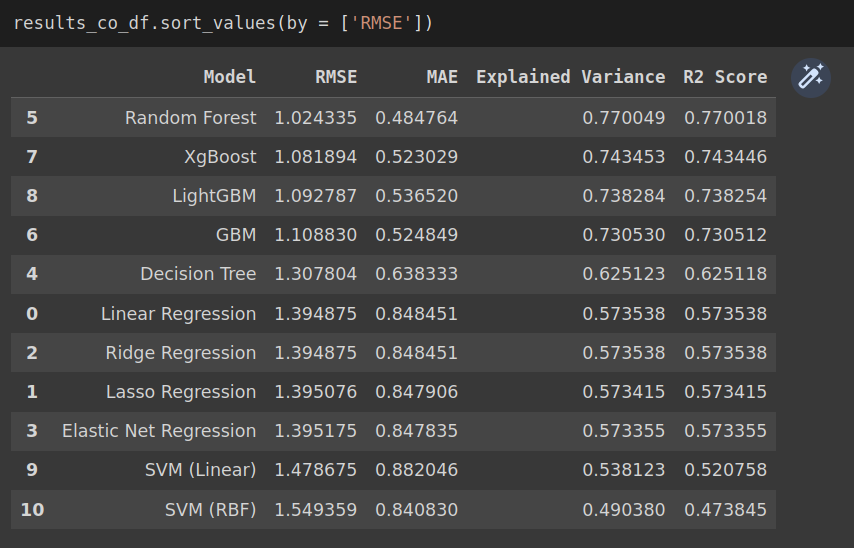

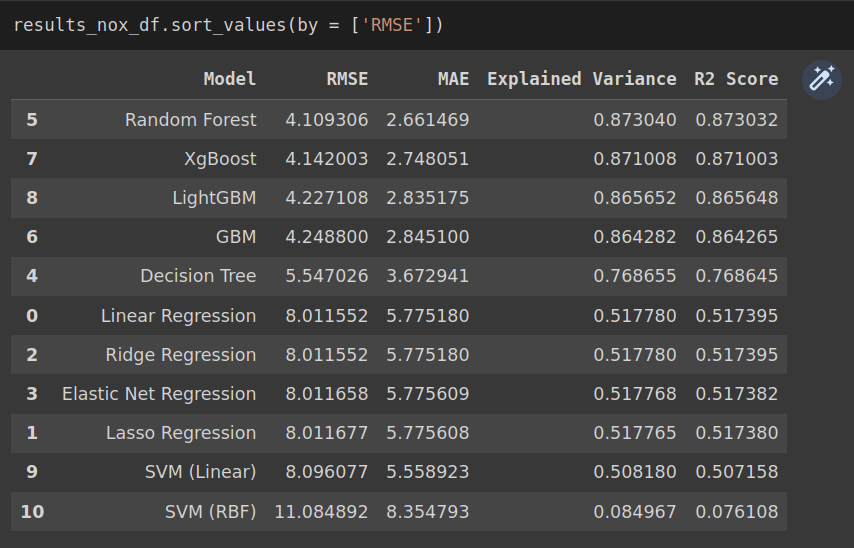

https://neptune.ai/blog/optuna-vs-hyperopt

https://neptune.ai/blog/best-tools-for-model-tuning-and-hyperparameter-optimization